In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [3]:
heart_data = pd.read_csv('heart.csv')

In [4]:
heart_data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
# Shows how many unique values are in each column
heart_data.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [6]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
# 3. One hot encode
heart_data = pd.get_dummies(heart_data, columns=['ChestPainType'], drop_first=True)
heart_data = pd.get_dummies(heart_data, columns=['RestingECG'], drop_first=True)
heart_data = pd.get_dummies(heart_data, columns=['ST_Slope'], drop_first=True)

heart_data['ExerciseAngina'] = heart_data['ExerciseAngina'].map({'N' : 0, 'Y' : 1})
heart_data['Sex'] = heart_data['Sex'].map({'M' : 0, 'F' : 1})

# Peek at the data
heart_data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,1,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,0,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,1,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,0,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True


In [8]:
X = heart_data.drop(columns=['HeartDisease'])
y = heart_data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))

Accuracy : 0.8586956521739131
Precision: 0.8857142857142857
Recall   : 0.8691588785046729
F1 Score : 0.8773584905660378


In [10]:
from xgboost import XGBClassifier

In [11]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train (fit) the model on the same training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Model Accuracy: {accuracy_xgb:.4f}")

XGBoost Model Accuracy: 0.8641


In [12]:
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1 Score :", f1_score(y_test, y_pred_xgb))

Accuracy : 0.8641304347826086
Precision: 0.8942307692307693
Recall   : 0.8691588785046729
F1 Score : 0.8815165876777251


In [13]:
heart_data['AgeGroup'] = pd.cut(
    heart_data['Age'],
    bins=[0, 40, 60, 120],
    labels=['Young', 'Middle', 'Old']
)

In [14]:
heart_data['BPGroup'] = pd.cut(
    heart_data['RestingBP'],
    bins=[0, 120, 140, 200],
    labels=['Normal', 'Prehypertension', 'Hypertension']
)

In [15]:
heart_data['CholGroup'] = pd.cut(
    heart_data['Cholesterol'],
    bins=[0, 200, 240, 600],
    labels=['Normal', 'Borderline', 'High']
)

In [16]:
heart_data['HRGroup'] = pd.cut(
    heart_data['MaxHR'],
    bins=[60, 120, 160, 220],
    labels=['Low', 'Moderate', 'High']
)

In [17]:
heart_data['OldpeakGroup'] = pd.cut(
    heart_data['Oldpeak'],
    bins=[-1, 0, 2, 10],
    labels=['Normal', 'Mild Depression', 'Severe Depression']
)

In [18]:
heart_data[['Age', 'AgeGroup', 'RestingBP', 'BPGroup']].head()

,Age,AgeGroup,RestingBP,BPGroup
0,40,Young,140,Prehypertension
1,49,Middle,160,Hypertension
2,37,Young,130,Prehypertension
3,48,Middle,138,Prehypertension
4,54,Middle,150,Hypertension


In [19]:
heart_data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,AgeGroup,BPGroup,CholGroup,HRGroup,OldpeakGroup
0,40,0,140,289,0,172,0,0.0,0,True,...,False,True,False,False,True,Young,Prehypertension,High,High,Normal
1,49,1,160,180,0,156,0,1.0,1,False,...,False,True,False,True,False,Middle,Hypertension,Normal,Moderate,Mild Depression
2,37,0,130,283,0,98,0,0.0,0,True,...,False,False,True,False,True,Young,Prehypertension,High,Low,Normal
3,48,1,138,214,0,108,1,1.5,1,False,...,False,True,False,True,False,Middle,Prehypertension,Borderline,Low,Mild Depression
4,54,0,150,195,0,122,0,0.0,0,False,...,False,True,False,False,True,Middle,Hypertension,Normal,Moderate,Normal


In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
heart_data['AgeGroup_Enc'] = le.fit_transform(heart_data['AgeGroup'])

In [21]:
heart_data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,...,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,AgeGroup,BPGroup,CholGroup,HRGroup,OldpeakGroup,AgeGroup_Enc
0,40,0,140,289,0,172,0,0.0,0,True,...,True,False,False,True,Young,Prehypertension,High,High,Normal,2
1,49,1,160,180,0,156,0,1.0,1,False,...,True,False,True,False,Middle,Hypertension,Normal,Moderate,Mild Depression,0
2,37,0,130,283,0,98,0,0.0,0,True,...,False,True,False,True,Young,Prehypertension,High,Low,Normal,2
3,48,1,138,214,0,108,1,1.5,1,False,...,True,False,True,False,Middle,Prehypertension,Borderline,Low,Mild Depression,0
4,54,0,150,195,0,122,0,0.0,0,False,...,True,False,False,True,Middle,Hypertension,Normal,Moderate,Normal,0


In [22]:
# AgeGroup: Young < Middle < Old
heart_data['AgeGroup'] = pd.cut(
    heart_data['Age'],
    bins=[0, 40, 60, 120],
    labels=['Young', 'Middle', 'Old']
)
heart_data['AgeGroup'] = pd.Categorical(
    heart_data['AgeGroup'],
    categories=['Young', 'Middle', 'Old'],
    ordered=True
)
heart_data['AgeGroup_encoded'] = heart_data['AgeGroup'].cat.codes

# BPGroup: Normal < Prehypertension < Hypertension
heart_data['BPGroup'] = pd.cut(
    heart_data['RestingBP'],
    bins=[0, 120, 140, 200],
    labels=['Normal', 'Prehypertension', 'Hypertension']
)
heart_data['BPGroup'] = pd.Categorical(
    heart_data['BPGroup'],
    categories=['Normal', 'Prehypertension', 'Hypertension'],
    ordered=True
)
heart_data['BPGroup_encoded'] = heart_data['BPGroup'].cat.codes

# CholGroup: Normal < Borderline < High
heart_data['CholGroup'] = pd.cut(
    heart_data['Cholesterol'],
    bins=[0, 200, 240, 600],
    labels=['Normal', 'Borderline', 'High']
)
heart_data['CholGroup'] = pd.Categorical(
    heart_data['CholGroup'],
    categories=['Normal', 'Borderline', 'High'],
    ordered=True
)
heart_data['CholGroup_encoded'] = heart_data['CholGroup'].cat.codes

# OldpeakGroup: Normal < Mild Depression < Severe Depression
heart_data['OldpeakGroup'] = pd.cut(
    heart_data['Oldpeak'],
    bins=[-1, 0, 2, 10],
    labels=['Normal', 'Mild Depression', 'Severe Depression']
)
heart_data['OldpeakGroup'] = pd.Categorical(
    heart_data['OldpeakGroup'],
    categories=['Normal', 'Mild Depression', 'Severe Depression'],
    ordered=True
)
heart_data['OldpeakGroup_encoded'] = heart_data['OldpeakGroup'].cat.codes

In [23]:
heart_data.drop(columns=["AgeGroup_Enc"], inplace = True)

In [24]:
heart_data.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,...,ST_Slope_Up,AgeGroup,BPGroup,CholGroup,HRGroup,OldpeakGroup,AgeGroup_encoded,BPGroup_encoded,CholGroup_encoded,OldpeakGroup_encoded
0,40,0,140,289,0,172,0,0.0,0,True,...,True,Young,Prehypertension,High,High,Normal,0,1,2,0
1,49,1,160,180,0,156,0,1.0,1,False,...,False,Middle,Hypertension,Normal,Moderate,Mild Depression,1,2,0,1
2,37,0,130,283,0,98,0,0.0,0,True,...,True,Young,Prehypertension,High,Low,Normal,0,1,2,0
3,48,1,138,214,0,108,1,1.5,1,False,...,False,Middle,Prehypertension,Borderline,Low,Mild Depression,1,1,1,1
4,54,0,150,195,0,122,0,0.0,0,False,...,True,Middle,Hypertension,Normal,Moderate,Normal,1,2,0,0


In [25]:
# Drop the original categorical (non-numeric) binned columns
heart_data = heart_data.drop(columns=[
    'AgeGroup', 'BPGroup', 'CholGroup', 'OldpeakGroup'
])

In [26]:
heart_data['HRGroup_encoded'] = heart_data['HRGroup'].cat.codes

In [27]:
heart_data = heart_data.drop(columns=['HRGroup'])

In [28]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   918 non-null    int64  
 1   Sex                   918 non-null    int64  
 2   RestingBP             918 non-null    int64  
 3   Cholesterol           918 non-null    int64  
 4   FastingBS             918 non-null    int64  
 5   MaxHR                 918 non-null    int64  
 6   ExerciseAngina        918 non-null    int64  
 7   Oldpeak               918 non-null    float64
 8   HeartDisease          918 non-null    int64  
 9   ChestPainType_ATA     918 non-null    bool   
 10  ChestPainType_NAP     918 non-null    bool   
 11  ChestPainType_TA      918 non-null    bool   
 12  RestingECG_Normal     918 non-null    bool   
 13  RestingECG_ST         918 non-null    bool   
 14  ST_Slope_Flat         918 non-null    bool   
 15  ST_Slope_Up           9

In [29]:
# Initialize the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Train (fit) the model on the same training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy :", accuracy_score(y_test, y_pred_xgb))
print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1 Score :", f1_score(y_test, y_pred_xgb))

Accuracy : 0.8641304347826086
Precision: 0.8942307692307693
Recall   : 0.8691588785046729
F1 Score : 0.8815165876777251


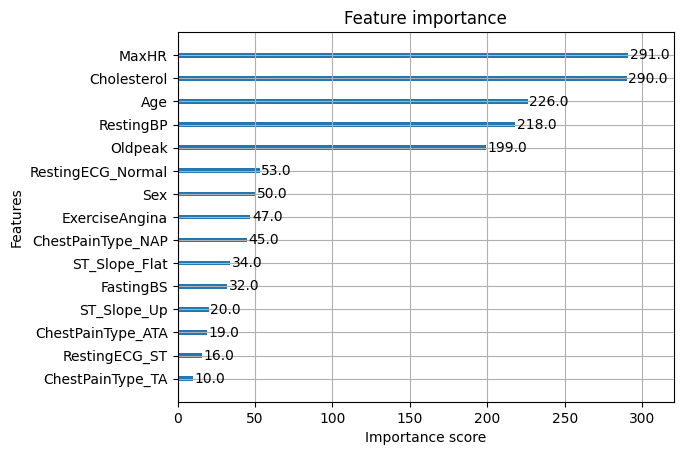

In [30]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=15)
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [33]:
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',  # <— Prioritize recall
    cv=3,
    verbose=1,
    n_jobs=-1  # Use all cores
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/opt/anaconda3/envs/tf-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:17:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/tf-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:17:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/tf-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:17:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/tf-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:17:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" }

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='recall', verbose=1)

In [34]:
print("Best Recall Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Recall Score: 0.9227359443384581
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [35]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        77
           1       0.89      0.91      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [36]:
print("Accuracy :", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall   :", recall_score(y_test, y_pred_best))
print("F1 Score :", f1_score(y_test, y_pred_best))

Accuracy : 0.8804347826086957
Precision: 0.8899082568807339
Recall   : 0.9065420560747663
F1 Score : 0.8981481481481481


In [37]:
from sklearn.model_selection import cross_val_score

# Use best parameters from grid search
xgb_cv_model = XGBClassifier(
    **grid_search.best_params_,
    eval_metric='logloss',
    random_state=42
)

# Run 5-fold cross-validation with recall as the metric
cv_scores = cross_val_score(
    xgb_cv_model,
    X_train,
    y_train,
    cv=5,
    scoring='recall'
)

print("Cross-Validated Recall Scores:", cv_scores)
print("Mean Recall:", cv_scores.mean())
print("Standard Deviation:", cv_scores.std())

Cross-Validated Recall Scores: [0.8875     0.925      0.9        0.86419753 0.9625    ]
Mean Recall: 0.9078395061728395
Standard Deviation: 0.033651233294041856


In [38]:
from sklearn.model_selection import cross_validate

cv_results = cross_validate(
    xgb_cv_model,
    X_train,
    y_train,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1']
)

# Show averages
for metric in cv_results:
    if "test" in metric:
        print(f"{metric}: {cv_results[metric].mean():.3f} ± {cv_results[metric].std():.3f}")

test_accuracy: 0.872 ± 0.026
test_precision: 0.866 ± 0.029
test_recall: 0.908 ± 0.034
test_f1: 0.886 ± 0.023


In [39]:
from sklearn.model_selection import StratifiedKFold, cross_validate

# Set up stratified CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use same tuned model
cv_results_strat = cross_validate(
    xgb_cv_model,
    X_train,
    y_train,
    cv=skf,
    scoring=['accuracy', 'precision', 'recall', 'f1']
)

# Print results
for metric in cv_results_strat:
    if "test" in metric:
        print(f"{metric}: {cv_results_strat[metric].mean():.3f} ± {cv_results_strat[metric].std():.3f}")

test_accuracy: 0.872 ± 0.012
test_precision: 0.862 ± 0.018
test_recall: 0.913 ± 0.011
test_f1: 0.886 ± 0.010


In [40]:

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='recall',  # <— Prioritize recall
    cv=skf,
    verbose=1,
    n_jobs=-1  # Use all cores
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


/opt/anaconda3/envs/tf-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:18:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/tf-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:18:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/tf-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:18:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/envs/tf-env/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:18:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" }

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='recall', verbose=1)

In [41]:
print("Best Recall Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Recall Score: 0.9126851851851852
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

# Define input shape
input_shape = X_train.shape[1]

# Build model
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(input_shape,)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile model
nn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy', 'Precision', 'Recall']
)

/opt/anaconda3/envs/tf-env/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
history = nn_model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Precision: 0.1880 - Recall: 0.0103 - accuracy: 0.4507 - loss: 15.9184 - val_Precision: 0.4823 - val_Recall: 0.9315 - val_accuracy: 0.4694 - val_loss: 1.5765
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.5555 - Recall: 0.9291 - accuracy: 0.5421 - loss: 2.3338 - val_Precision: 0.8485 - val_Recall: 0.3836 - val_accuracy: 0.6599 - val_loss: 1.0110
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.7629 - Recall: 0.4830 - accuracy: 0.6323 - loss: 0.9890 - val_Precision: 0.6596 - val_Recall: 0.8493 - val_accuracy: 0.7075 - val_loss: 0.6880
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.7569 - Recall: 0.7183 - accuracy: 0.7031 - loss: 0.6916 - val_Precision: 0.6667 - val_Recall: 0.8219 - val_accuracy: 0.7075 - val_loss: 0.6394
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Precision: 0.7408 - Recall: 0.7674 - accuracy: 0.7160 - loss: 0.6705 - val_Precision: 0.7297 - val_Recall: 0.7397 -

In [44]:
# Predict probabilities
y_pred_prob = nn_model.predict(X_test).flatten()

# Convert to binary
y_pred_nn = (y_pred_prob > 0.5).astype(int)

# Evaluate
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nn))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
              precision    recall  f1-score   support

           0       0.82      0.83      0.83        77
           1       0.88      0.87      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

